In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix


# reading the dataset
df = pd.read_excel('C:/Users/User/Downloads/emdat_public_2020_11_01_query_uid-MSWGVQ.xlsx')

In [20]:
# Display basic information about the dataset
df.info()

# Display descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 64 to 15505
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           1647 non-null   object 
 1   Year                             1647 non-null   int64  
 2   Seq                              1647 non-null   int64  
 3   Disaster Group                   1647 non-null   object 
 4   Disaster Subgroup                1647 non-null   object 
 5   Disaster Type                    1647 non-null   object 
 6   Disaster Subtype                 1547 non-null   object 
 7   Disaster Subsubtype              61 non-null     object 
 8   Event Name                       418 non-null    object 
 9   Entry Criteria                   1646 non-null   object 
 10  Country                          1647 non-null   object 
 11  ISO                              1647 non-null   object 
 12  Region                 

Year          Seq  Aid Contribution  Dis Mag Value   Start Year  \
count  1647.000000  1647.000000        274.000000   1.647000e+03  1647.000000   
mean   2000.209472   285.898604      17547.120438   4.968847e+04  2000.210079   
std      13.967562   370.773139      71244.526670   1.777880e+05    13.967792   
min    1906.000000     1.000000          1.000000  -5.700000e+01  1906.000000   
25%    1994.000000    96.000000        371.500000   8.000000e+00  1994.000000   
50%    2002.000000   247.000000       1578.500000   2.200000e+02  2002.000000   
75%    2010.000000   428.500000       6372.500000   1.999000e+04  2010.000000   
max    2020.000000  9244.000000     844063.000000   2.857000e+06  2020.000000   

       Start Month    Start Day     End Year    End Month      End Day  \
count  1647.000000  1598.000000  1647.000000  1646.000000  1596.000000   
mean      6.786278    15.756571  2000.219794     6.926488    15.828947   
std       3.203580     9.057263    13.972122     3.215096     8.858848   
min       1.000000     1.000000  1906.000000     1.000000     1.000000   
25%       4.000000     8.000000  1994.000000     5.000000     8.000000   
50%       7.000000    16.000000  2002.000000     7.000000    16.000000   
75%       9.000000    24.000000  2010.000000     9.000000    23.000000   
max      12.000000    31.000000  2020.000000    12.000000    31.000000   

        Total Deaths     No Injured   No Affected   No Homeless  \
count    1647.000000     941.000000  1.358000e+03  4.600000e+02   
mean     1271.892532    3701.098831  1.734437e+06  1.477027e+05   
std     11706.499216   21617.901240  1.038363e+07  8.270108e+05   
min         1.000000       1.000000  2.000000e+01  1.000000e+01   
25%         6.000000      30.000000  8.314500e+03  2.674250e+03   
50%        25.000000     120.000000  6.000000e+04  1.251950e+04   
75%        93.500000     543.000000  4.000000e+05  7.125000e+04   
max    242000.000000  366596.000000  2.230000e+08  1.585000e+07   

       Total Affected  Reconstruction Costs ('000 US$)  \
count    1.647000e+03                     1.400000e+01   
mean     1.473461e+06                     4.256328e+06   
std      9.695427e+06                     7.055541e+06   
min      2.000000e+00                     3.000000e+03   
25%      4.000000e+03                     1.456610e+05   
50%      3.900800e+04                     1.002876e+06   
75%      3.003465e+05                     4.736000e+06   
max      2.389730e+08                     2.500000e+07   

       Insured Damages ('000 US$)  Total Damages ('000 US$)          CPI  
count                3.400000e+02              1.647000e+03  1642.000000  
mean                 1.444046e+06              1.291897e+06    68.871649  
std                  5.111745e+06              8.018354e+06    21.238736  
min                  4.100000e+01              2.000000e+00     3.522300  
25%                  5.000000e+04              1.200000e+04    57.977974  
50%                  2.000000e+05              8.500000e+04    70.357819  
75%                  7.000000e+05              4.670500e+05    84.215229  
max                  6.000000e+07              2.100000e+08   100.000000

In [5]:
# printing the sum of null spaces/bvalues

print(df.isnull().sum())

Dis No                                 0
Year                                   0
Seq                                    0
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2892
Disaster Subsubtype                14542
Event Name                         11838
Entry Criteria                       335
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1777
Origin                             12038
Associated Dis                     12453
Associated Dis2                    14902
OFDA Response                      13957
Appeal                             12997
Declaration                        12367
Aid Contribution                   14887
Dis Mag Value                      10713
Dis Mag Scale                       1161
Latitude        

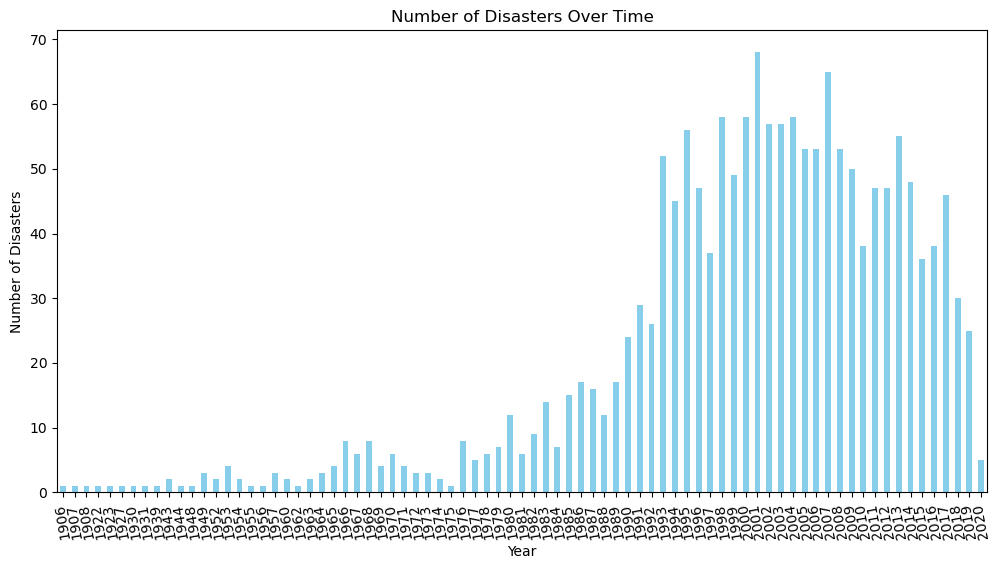

In [57]:
import matplotlib.pyplot as plt
# PLOTING NUMBER OF DISASTERS OVER TIME
# Group by year and count the number of disasters
disaster_count = df.groupby('Year').size()

# Plot
plt.figure(figsize=(12, 6))
disaster_count.plot(kind='bar', color='skyblue')
plt.title('Number of Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=100)
plt.show()


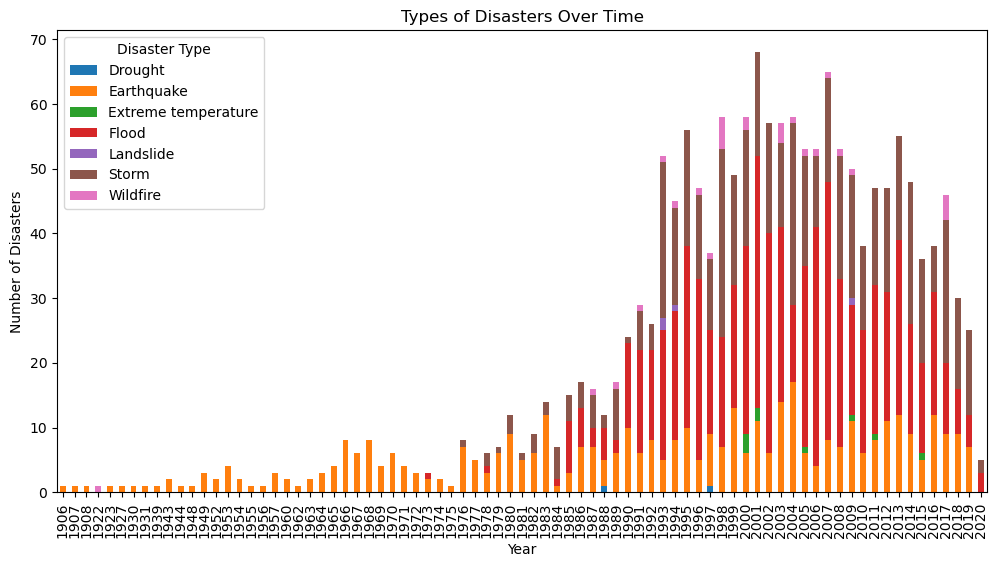

In [63]:
# Group by year and disaster type, counting occurrences
disaster_types = df.groupby(['Year', 'Disaster Type']).size().unstack().fillna(0)

# Plot
disaster_types.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Types of Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type')
plt.xticks(rotation=90)
plt.show()


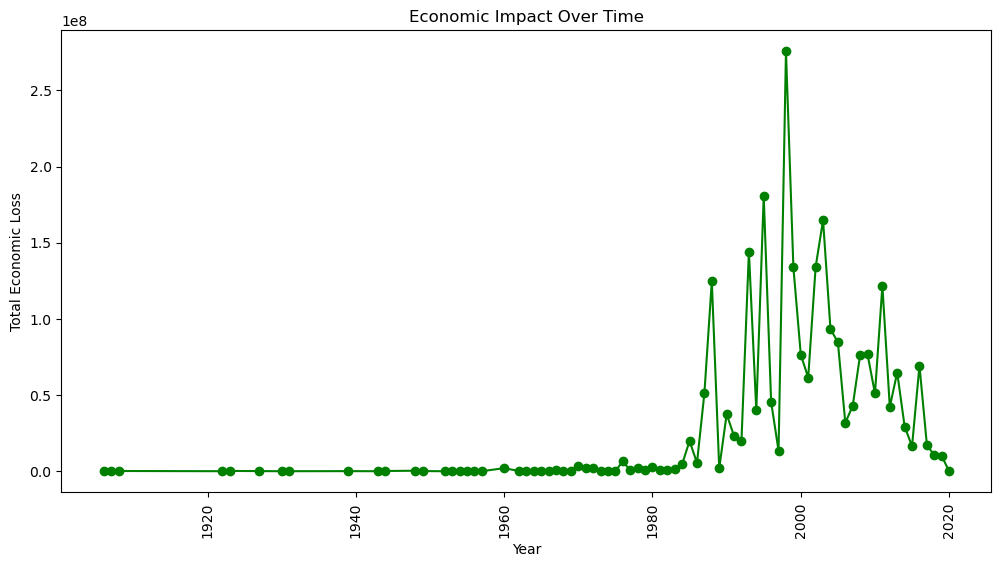

In [71]:
# Group by year and sum economic losses
economic_impact = df.groupby('Year')['Total Affected'].sum()

# Plot
plt.figure(figsize=(12, 6))
economic_impact.plot(kind='line', marker='o', color='green')
plt.title('Economic Impact Over Time')
plt.xlabel('Year')
plt.ylabel('Total Economic Loss')
plt.xticks(rotation=90)
plt.show()


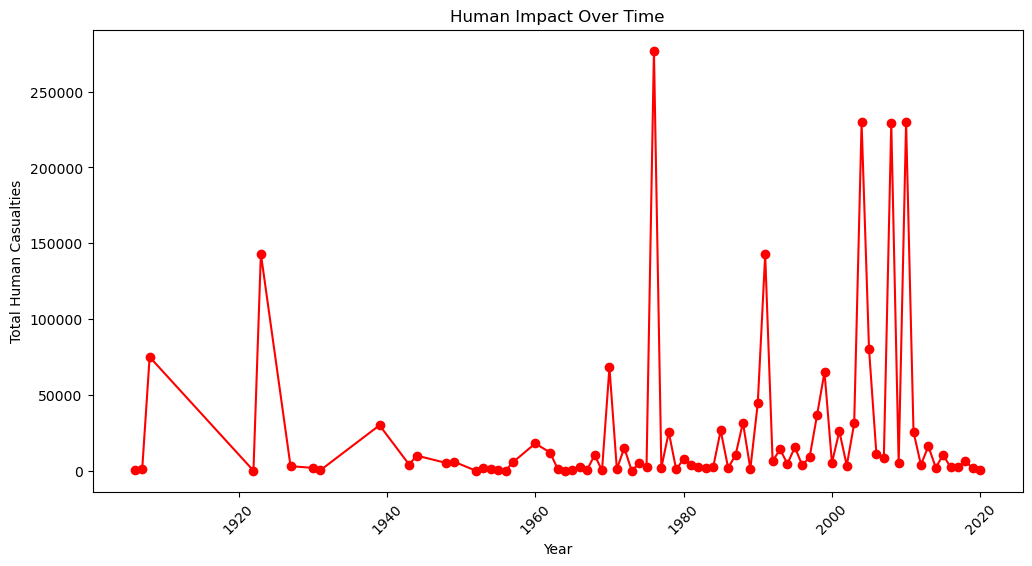

In [75]:
# Group by year and sum casualties
human_impact = df.groupby('Year')['Total Deaths'].sum()

# Plot
plt.figure(figsize=(12, 6))
human_impact.plot(kind='line', marker='o', color='red')
plt.title('Human Impact Over Time')
plt.xlabel('Year')
plt.ylabel('Total Human Casualties')
plt.xticks(rotation=45)
plt.show()


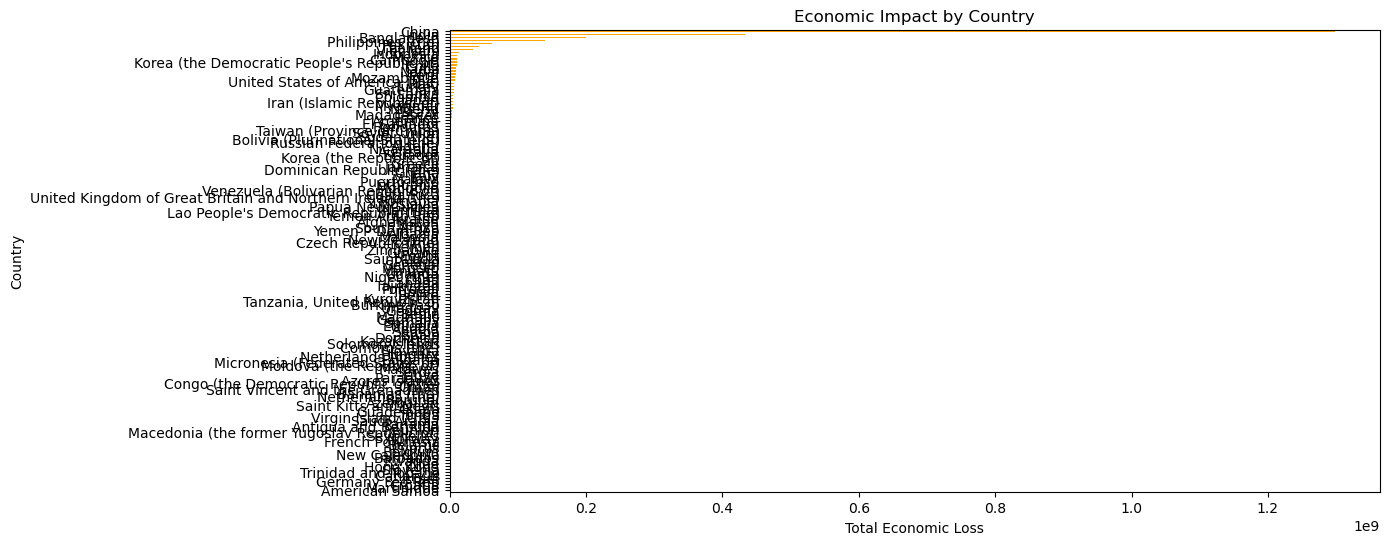

In [85]:
# Sum economic losses by country
economic_impact_by_country = df.groupby('Country')['Total Affected'].sum()

# Plot
plt.figure(figsize=(12, 6))
economic_impact_by_country.sort_values().plot(kind='barh', color='orange')
plt.title('Economic Impact by Country')
plt.xlabel('Total Economic Loss')
plt.ylabel('Country')
plt.show()



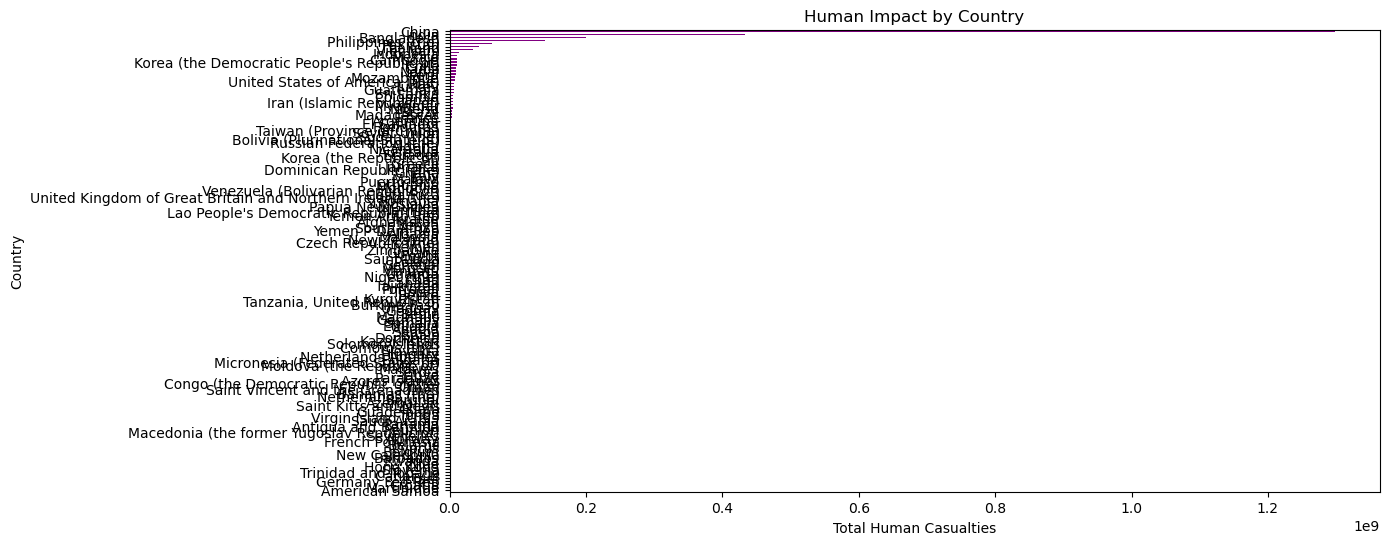

In [95]:
# Group human casualties by country
human_impact_by_country = df.groupby('Country')['Total Affected'].sum()

# Plot
plt.figure(figsize=(12, 6))
human_impact_by_country.sort_values().plot(kind='barh', color='purple')
plt.title('Human Impact by Country')
plt.xlabel('Total Human Casualties')
plt.ylabel('Country')
plt.show()


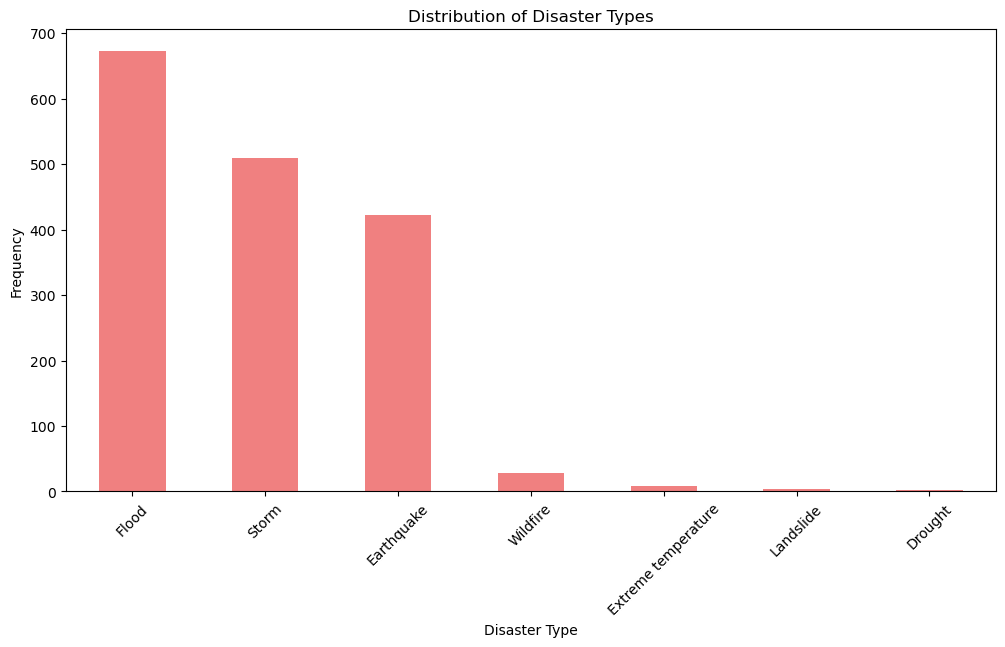

In [105]:
# Plot the frequency of each disaster type

plt.figure(figsize=(12, 6))
df['Disaster Type'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


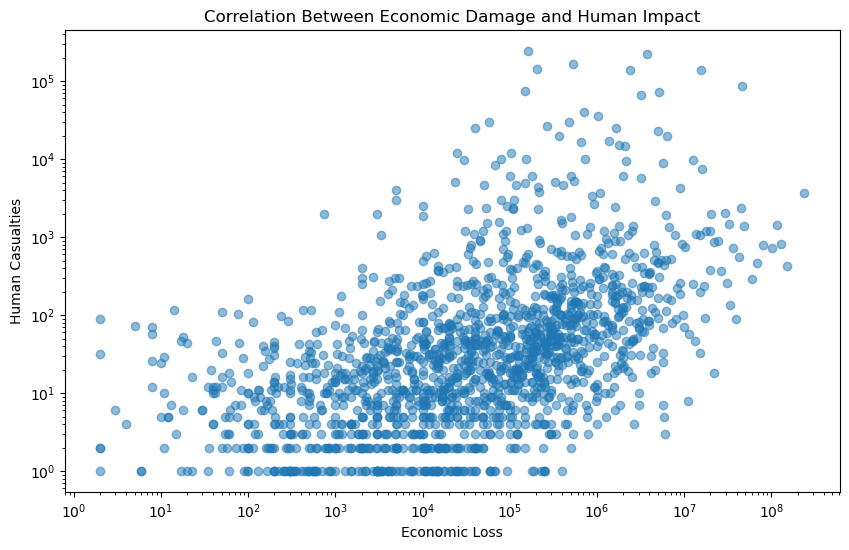

In [30]:


# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Affected'], df['Total Deaths'], alpha=0.5)
plt.title('Correlation Between Economic Damage and Human Impact')
plt.xlabel('Economic Loss')
plt.ylabel('Human Casualties')
plt.xscale('log')  
plt.yscale('log') 
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_21540\4236195056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Disaster Type', y='Total Affected', palette=unique_palette)


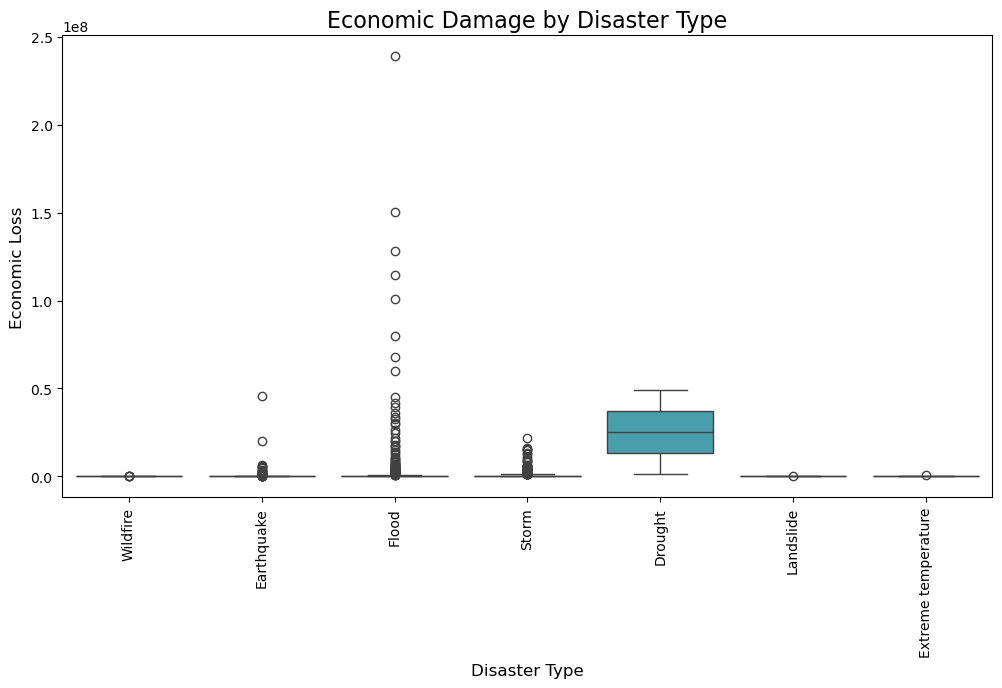

In [28]:



unique_palette = sns.color_palette("husl", n_colors=df['Disaster Type'].nunique())

# Plotting the box plot with unique colors
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Disaster Type', y='Total Affected', palette=unique_palette)
plt.title('Economic Damage by Disaster Type', fontsize=16)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Economic Loss', fontsize=12)
plt.xticks(rotation=90)
plt.show()

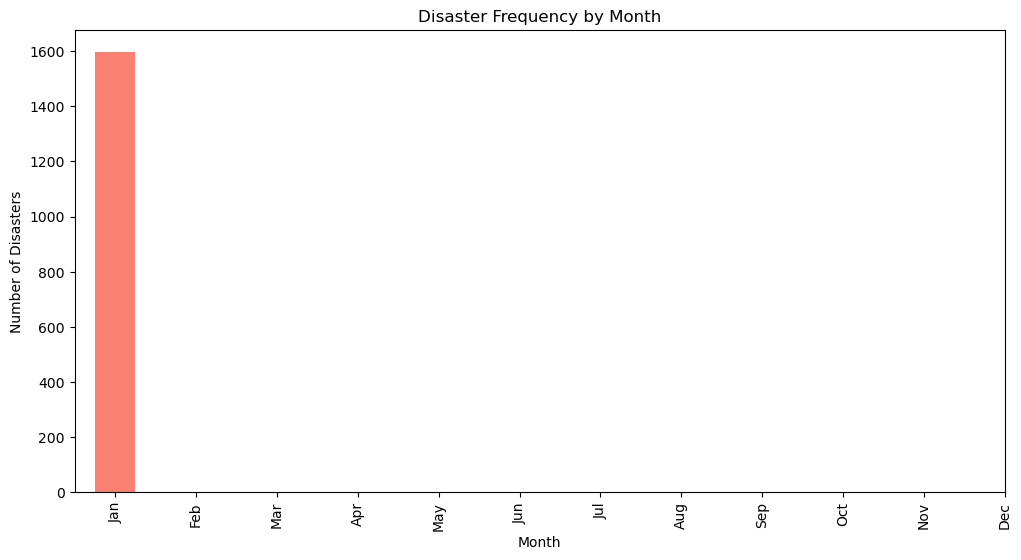

In [124]:
# Extract month from date column if available
df['Start Month'] = pd.to_datetime(df['Start Day']).dt.month

# Group by month and count disasters
seasonality = df.groupby('Start Month').size()

# Plot
plt.figure(figsize=(12, 6))
seasonality.plot(kind='bar', color='salmon')
plt.title('Disaster Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


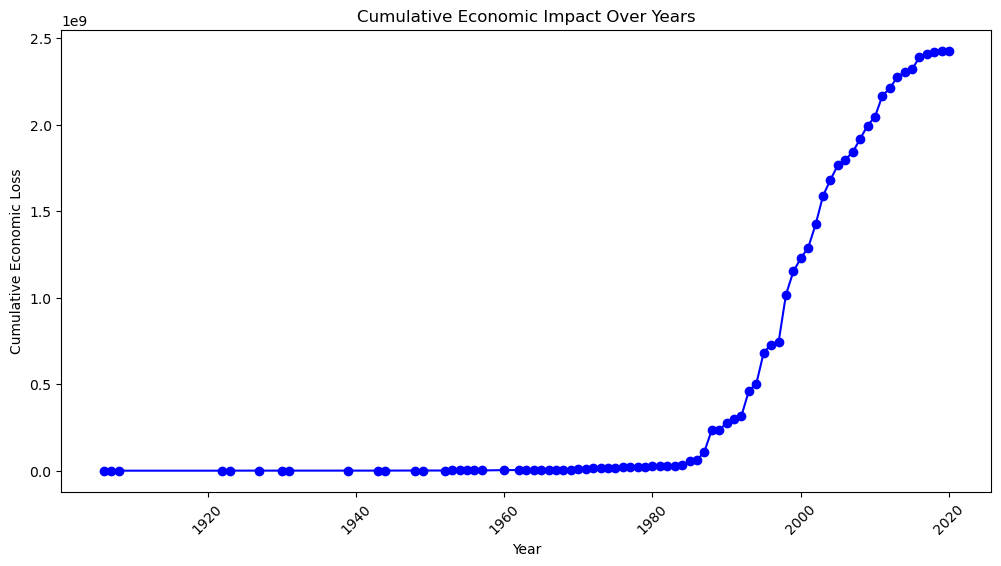

In [126]:
# Cumulative sum of economic losses over the years
cumulative_economic_impact = df.groupby('Year')['Total Affected'].sum().cumsum()

# Plot
plt.figure(figsize=(12, 6))
cumulative_economic_impact.plot(kind='line', marker='o', color='blue')
plt.title('Cumulative Economic Impact Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Economic Loss')
plt.xticks(rotation=45)
plt.show()


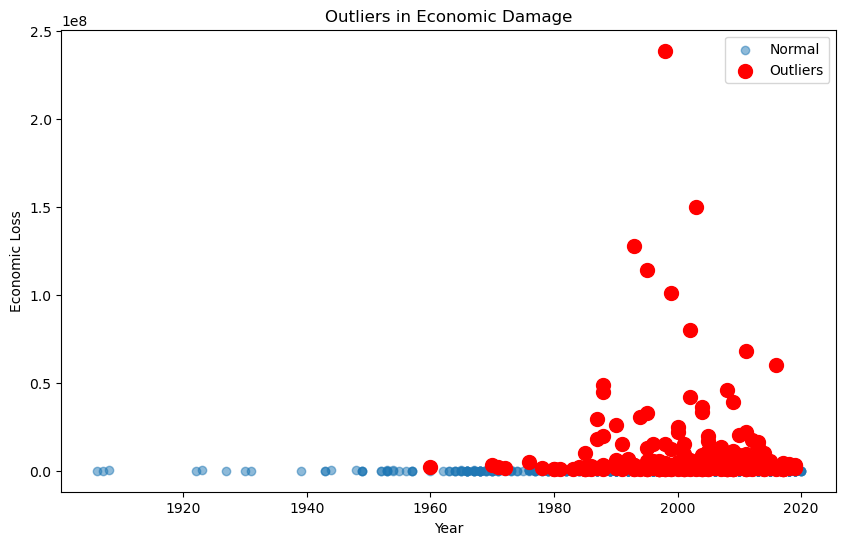

In [134]:
# Identify outliers using IQR
Q1 = df['Total Affected'].quantile(0.25)
Q3 = df['Total Affected'].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df['Total Affected'] < (Q1 - 1.5 * IQR)) | (df['Total Affected'] > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Total Affected'], alpha=0.5, label='Normal')
plt.scatter(outliers['Year'], outliers['Total Affected'], color='red', label='Outliers', s=100)
plt.title('Outliers in Economic Damage')
plt.xlabel('Year')
plt.ylabel('Economic Loss')
plt.legend()
plt.show()


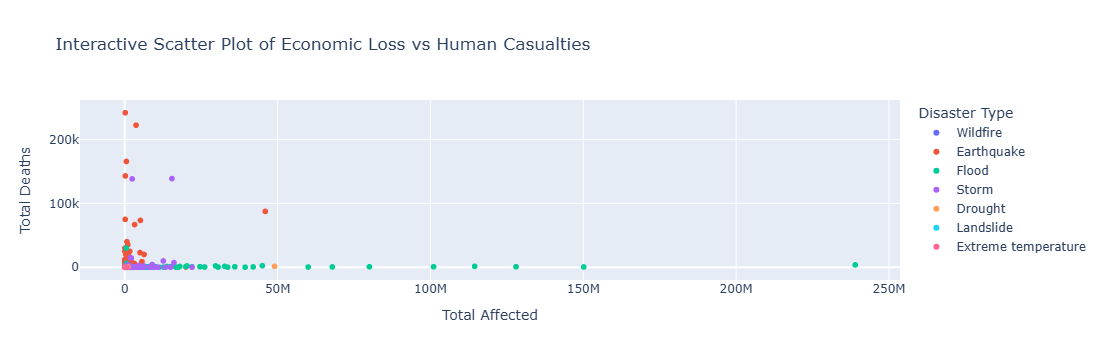

In [136]:
import plotly.express as px

fig = px.scatter(df, x='Total Affected', y='Total Deaths', color='Disaster Type',
                 title='Interactive Scatter Plot of Economic Loss vs Human Casualties')
fig.show()


Data preprocessing complete. Ready for model training.


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model training complete.
Accuracy: 0.9272727272727272
Classification Report:                      precision    recall  f1-score   support

         Earthquake       1.00      1.00      1.00        85
Extreme temperature       0.50      0.50      0.50         2
              Flood       0.93      0.92      0.93       146
          Landslide       0.00      0.00      0.00         2
              Storm       0.87      0.96      0.91        89
           Wildfire       0.00      0.00      0.00         6

           accuracy                           0.93       330
          macro avg       0.55      0.56      0.56       330
       weighted avg       0.91      0.93      0.92       330



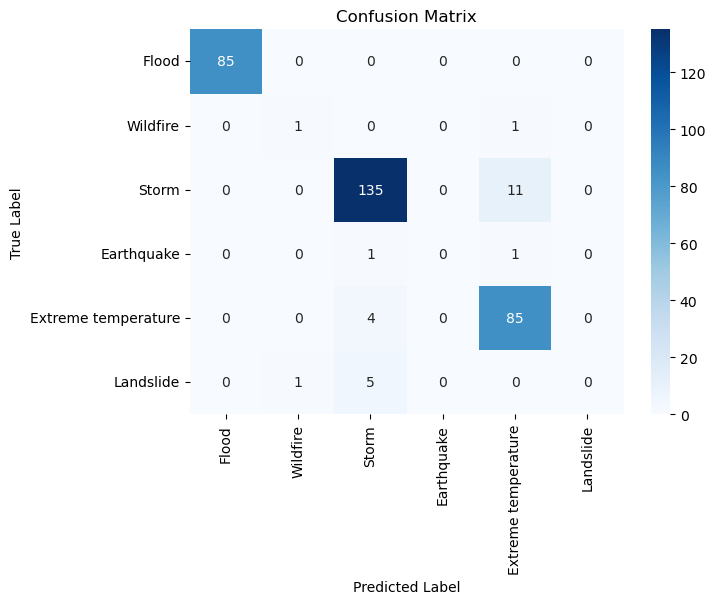

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [34]:
# training and fittin classification model
# reading the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix
df = pd.read_excel('C:/Users/User/Downloads/emdat_public_2020_11_01_query_uid-MSWGVQ.xlsx')

features = ['Year', 'Dis Mag Value', 'Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
target = 'Disaster Type'

# Drop rows with missing values in the selected columns
df = df.dropna(subset=features + [target])

# Split the data into features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Data preprocessing complete. Ready for model training.')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Model training complete.')
print('Accuracy:', accuracy)
print('Classification Report:\
', report)



from sklearn.metrics import confusion_matrix

# Compute confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot feature importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Assuming y_test and y_pred are available and classes are known
classes = y_test.unique()
plot_confusion_matrix(y_test, y_pred, classes)

# Assuming X_train_scaled is a DataFrame with feature names
plot_feature_importance(model, X_train_scaled.columns)



In [4]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    

# Plot feature importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix


# reading the dataset
df = pd.read_excel('C:/Users/User/Downloads/emdat_public_2020_11_01_query_uid-MSWGVQ.xlsx')


disaster_features = ['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'Total Damages (\'000 US$)']

# Select relevant features for region-based clustering
region_features = ['Disaster Type', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'Total Damages (\'000 US$)']

# Function to preprocess data for clustering
def preprocess_for_clustering(data, features):
    # Select features
    X = data[features].copy()
    
    # Handle missing values
    X = X.fillna(X.mean())
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, X.columns

# Preprocess data for disaster clustering
X_disaster, disaster_columns = preprocess_for_clustering(df, disaster_features)

# Preprocess data for region-based clustering
df_region = df.groupby('Region').agg({
    'Disaster Type': 'count',
    'Total Deaths': 'sum',
    'No Injured': 'sum',
    'No Affected': 'sum',
    'No Homeless': 'sum',
    'Total Affected': 'sum',
    'Total Damages (\'000 US$)': 'sum'
}).reset_index()

X_region, region_columns = preprocess_for_clustering(df_region, region_features)


print("Data preprocessed for clustering.")
print("Shape of disaster clustering data:", X_disaster.shape)
print("Shape of region clustering data:", X_region.shape)

Data preprocessed for clustering.
Shape of disaster clustering data: (15564, 6)
Shape of region clustering data: (23, 7)


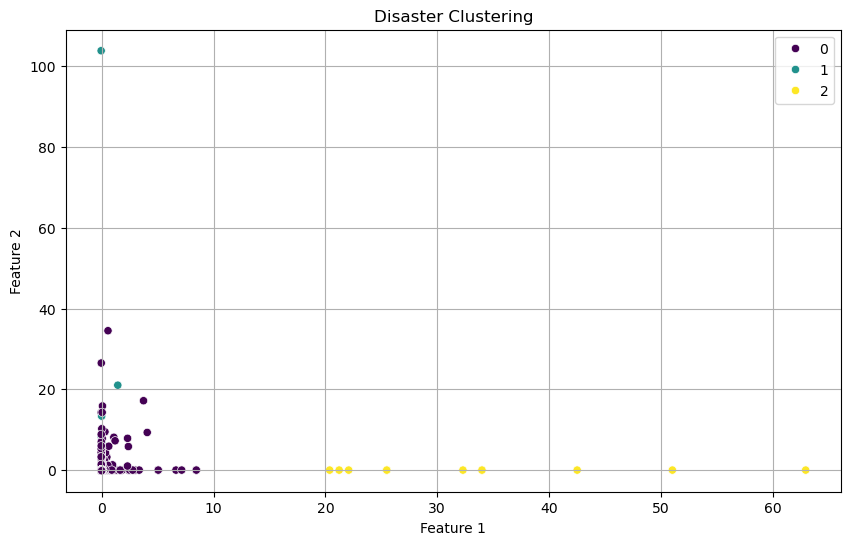

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


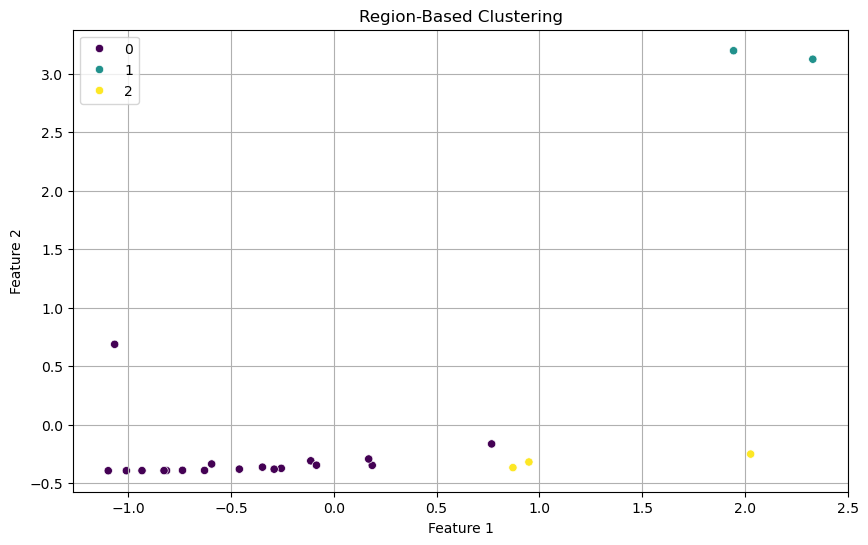

Clustering completed for both disaster and region data.


In [22]:
from sklearn.cluster import KMeans

def perform_kmeans_clustering(X, n_clusters, title):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model
    kmeans.fit(X)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()
    
    return labels

# Perform K-means clustering for disaster data
n_clusters_disaster = 3
labels_disaster = perform_kmeans_clustering(X_disaster, n_clusters_disaster, 'Disaster Clustering')

n_clusters_region = 3
labels_region = perform_kmeans_clustering(X_region, n_clusters_region, 'Region-Based Clustering')

print("Clustering completed for both disaster and region data.")

In [28]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for disaster data
silhouette_disaster = silhouette_score(X_disaster, labels_disaster)
print(f'Silhouette Score for Disaster Clustering: {silhouette_disaster}')

# Calculate silhouette score for region data
silhouette_region = silhouette_score(X_region, labels_region)
print(f'Silhouette Score for Region Clustering: {silhouette_region}')


Silhouette Score for Disaster Clustering: 0.9830657652998934
Silhouette Score for Region Clustering: 0.6262275508670377


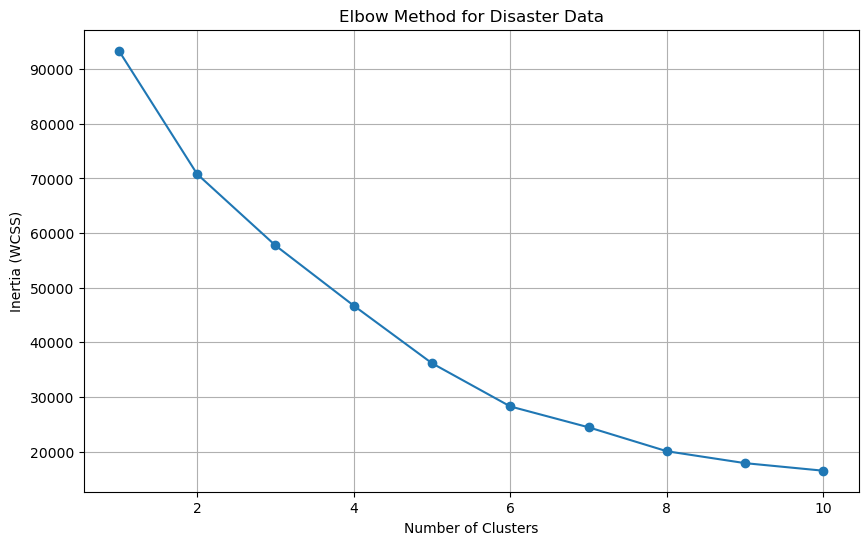

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

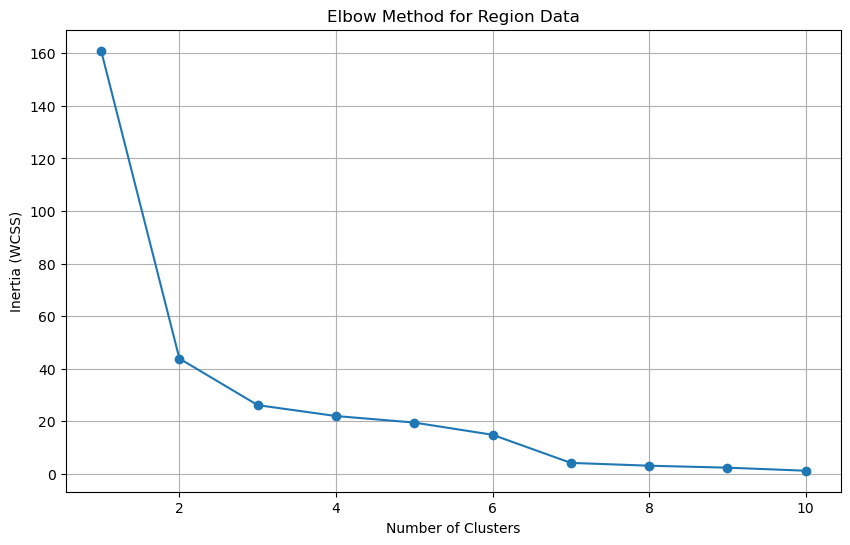

In [30]:
def plot_elbow_method(X, max_clusters, title):
    inertia_values = []
    
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
    plt.title(f'Elbow Method for {title}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)
    plt.show()

# Plot elbow method for disaster data
plot_elbow_method(X_disaster, 10, 'Disaster Data')

# Plot elbow method for region data
plot_elbow_method(X_region, 10, 'Region Data')


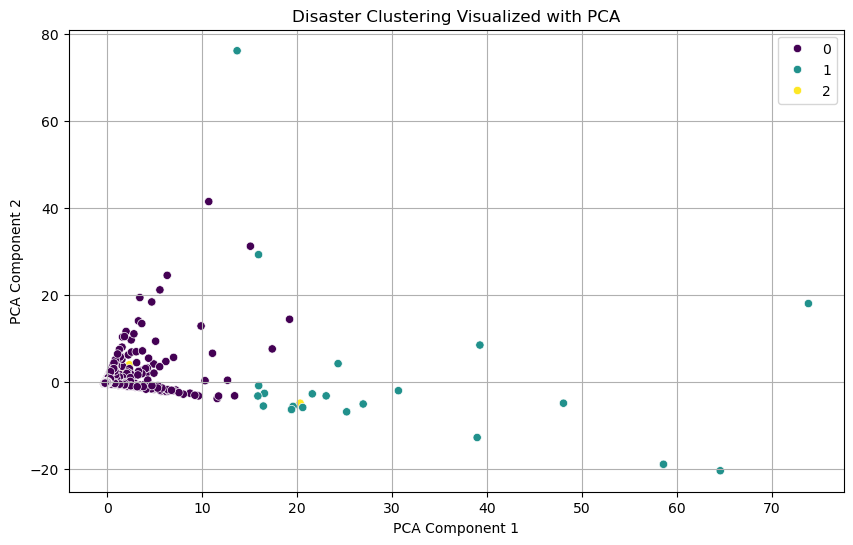

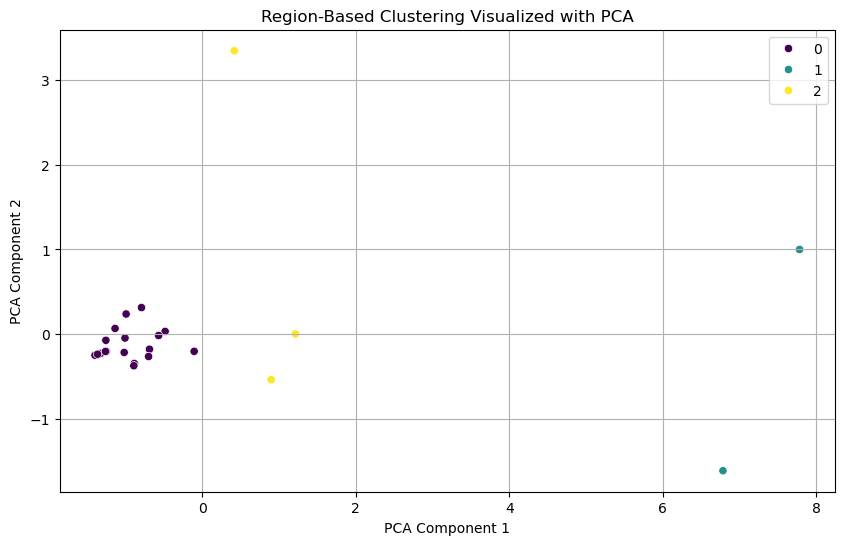

In [32]:
from sklearn.decomposition import PCA

def plot_clusters_with_pca(X, labels, n_components=2, title='Clusters'):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(f'{title} Visualized with PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# Visualize clusters for disaster data with PCA
plot_clusters_with_pca(X_disaster, labels_disaster, title='Disaster Clustering')

# Visualize clusters for region data with PCA
plot_clusters_with_pca(X_region, labels_region, title='Region-Based Clustering')
